# housing-price-forecast

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm

In [52]:
boston = sd.load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
# data.info()查看这组数据的信息
# data.describe()查看这组数据的一些概况量，比如：最大值，均值等
data['Target']=boston.target#将target值添加进data数据中最后一列，便于之后的分析
data.head(3)#查看前三行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [53]:
data['CHAS'].value_counts()
data.pivot_table(index='CHAS', values='Target')

,Target
CHAS,
0.0,22.093843
1.0,28.440000


<AxesSubplot:xlabel='CRIM', ylabel='Target'>

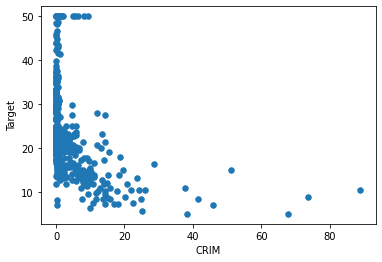

In [54]:
#观察特征与房价之间的关系
data.plot.scatter(x='CRIM',y='Target',s=30)#犯罪率与房价之间的关系走势图

In [55]:
import sklearn.model_selection as ms #几乎所有的前期准备和模型的选择都会在这个包里面出现

# 1.整理输入集和输出集
x, y = data.loc[:, :'LSTAT'], data['Target']
# 2.拆分测试集、训练集
#random_state: 即随机种子，使用相同的种子做多次的随即拆分，会得到相同的结果，后面的值可以自己设定，只要保证每次使用是一样的即可
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.2, random_state=7)

In [56]:
# 3. 使用训练集训练模型、使用测试集测试模型，输出模型得分
model = lm.LinearRegression()
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.7698532963729758
Testing r2: 0.5785415472763413


In [59]:
#岭回归
model_Ridge = lm.Ridge(100)
model_Ridge.fit(train_x, train_y)
pred_train_yII = model_Ridge.predict(train_x)
pred_test_yII = model_Ridge.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_yII))
print('Testing r2:', sm.r2_score(test_y, pred_test_yII))

Training r2: 0.736070155265425
Testing r2: 0.6534834314895364
